In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

<Figure size 640x480 with 0 Axes>

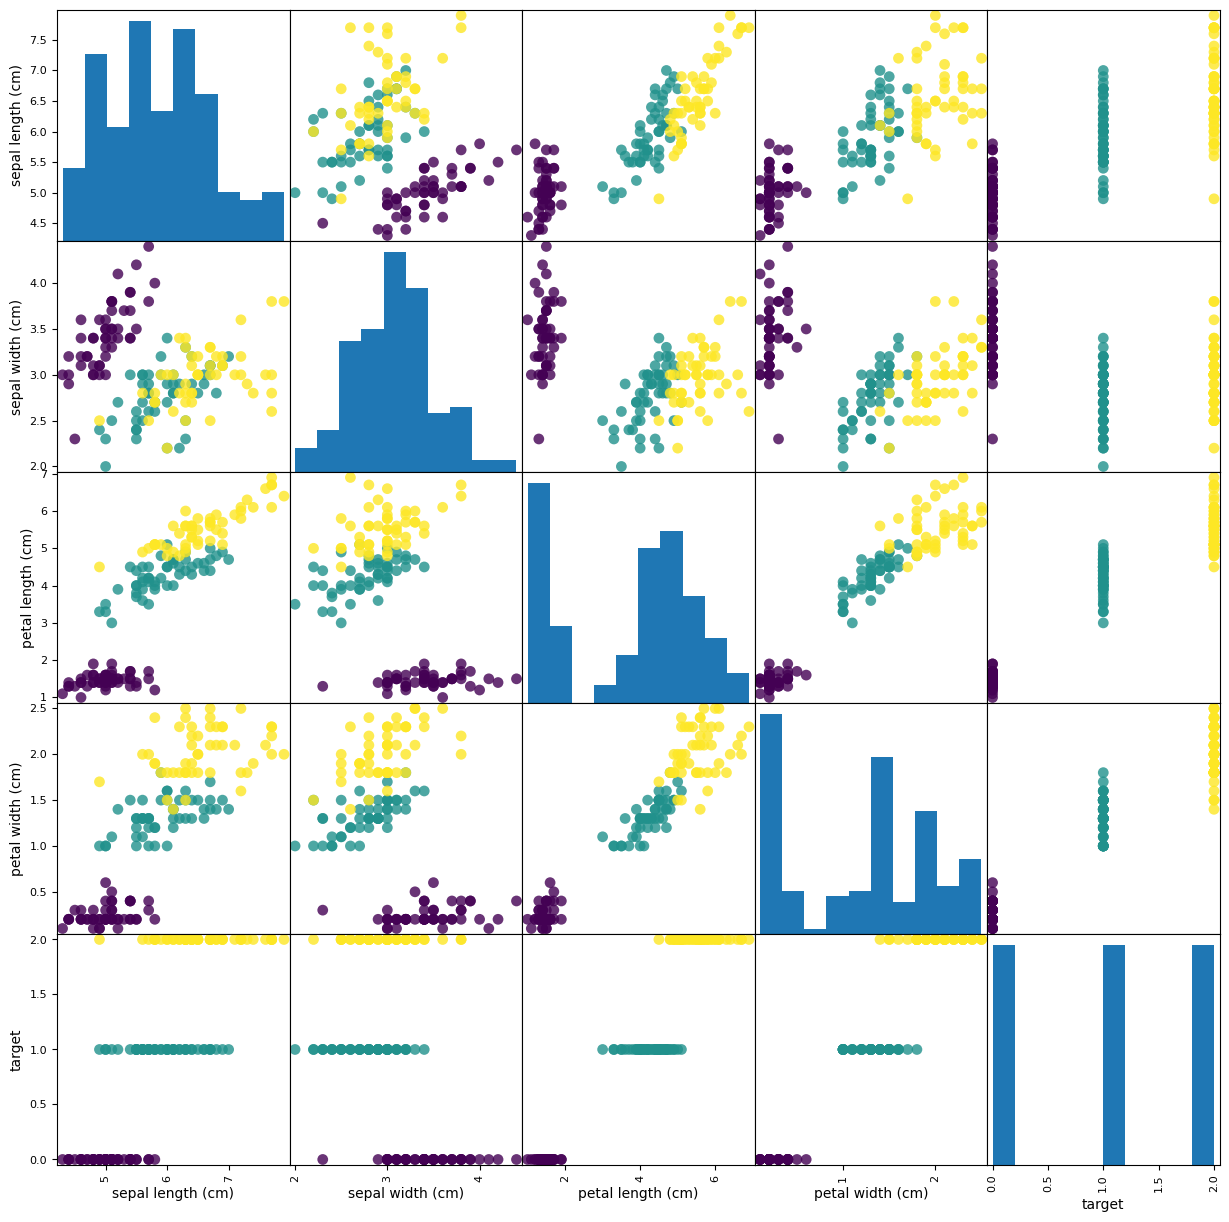

In [19]:
iris = datasets.load_iris()
X = iris.data[:]
y = iris.target

# Combine features and target using np.c_
data = np.c_[X, y]  # Concatenate column-wise

iris_dataframe = pd.DataFrame(data=data, columns=iris["feature_names"] + ["target"])

plt.figure()
grr = pd.plotting.scatter_matrix(
    iris_dataframe, c=iris["target"], figsize=(15, 15), marker="o", s=60, alpha=0.8
)
plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [21]:
accuracyTest = {}
accuracyTrain = {}

for k in range(len(y_test)):

    knn = KNeighborsClassifier(n_neighbors=k + 1, p=2, metric="minkowski")
    knn.fit(X_train_std, y_train)
    y_pred = knn.predict(X_test_std)
    y_train_pred = knn.predict(X_train_std)

    if (k + 1) % 10 == 0:
        print(10 * "-")
        print(f"For k = {k+1}")
        print(f"Number in test: {len(y_test)}")
        print(f"Misclassified samples: {(y_test != y_pred).sum()}")

    accTrain = accuracy_score(y_train, y_train_pred)
    acc = accuracy_score(y_test, y_pred)
    accuracyTest[k + 1] = acc
    accuracyTrain[k + 1] = accTrain

----------
For k = 10
Number in test: 38
Misclassified samples: 1
----------
For k = 20
Number in test: 38
Misclassified samples: 2
----------
For k = 30
Number in test: 38
Misclassified samples: 4


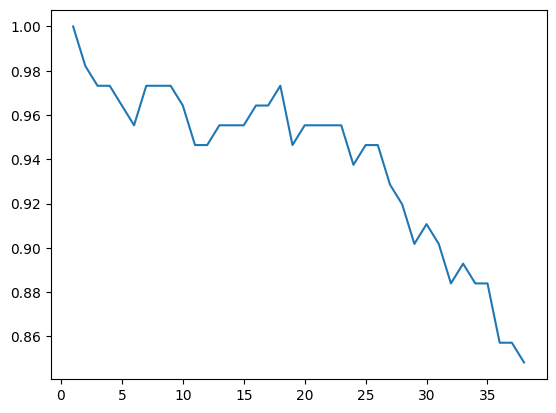

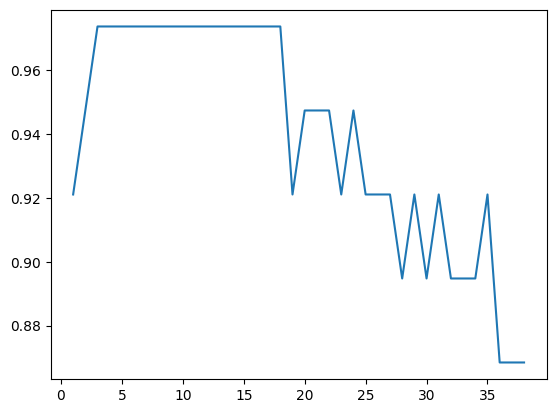

In [22]:
for accuracy in [accuracyTrain, accuracyTest]:
    lists = sorted(
        accuracy.items()
    )  # necessary as dictionary order is not guaranteed before python 3.7
    X, y = zip(*lists)
    plt.plot(X, y)
    plt.show()